# Edge detection with OpenCV

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

#### 1. Load and show the images 'Disk/DISK01.JPG', 'Classification/Parts00.jpg', 'Chocolate/Chocolate 01.jpg' and 'Geometric Matching/Gauges 01.tif' (`im1`, `im2`, `im3` and `im4`)

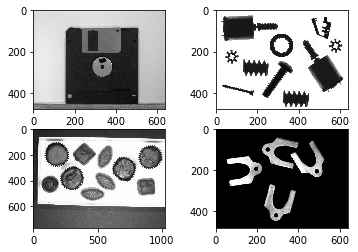

In [4]:
im1 = cv2.imread('../Images/Disk/DISK01.JPG', 0)
im2 = cv2.imread('../Images/Classification/Parts00.png', 0) 
im3 = cv2.imread('../Images/Chocolate/Chocolate 01.jpg', 0) 
im4 = cv2.imread('../Images/Geometric Matching/Gauges 01.tif', 0)

plt.figure(0)
plt.subplot(2,2,1), plt.imshow(im1, 'gray')
plt.subplot(2,2,2), plt.imshow(im2, 'gray')
plt.subplot(2,2,3), plt.imshow(im3, 'gray')
plt.subplot(2,2,4), plt.imshow(im4, 'gray')
plt.show()

#### 2. Obtain the Sobel gradient for `x` and `y` directions of the image `im1` and show in a figure the original image, its gradients in both directions and the module of the gradient vector.

Sobel kernels help to compute the gradient in one direction (horizontal or vertical). The vertical version is:

$$
\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & 1
\end{bmatrix}
$$

And the horizontal version is just the transpose of the vertical.

In [5]:
sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sy = np.copy(sx.T)

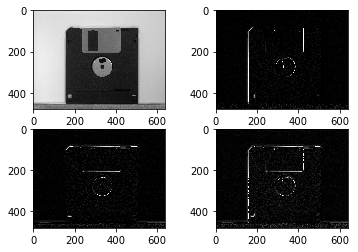

In [6]:
im1sx = cv2.filter2D(im1, -1, sx) # gradient in x direction
im1sy = cv2.filter2D(im1, -1, sy) # gradient in y direction
im1s = np.abs(im1sx) + np.abs(im1sy) # module of the gradient vector

plt.figure(1)
plt.subplot(2,2,1), plt.imshow(im1, 'gray')
plt.subplot(2,2,2), plt.imshow(im1sx, 'gray')
plt.subplot(2,2,3), plt.imshow(im1sy, 'gray')
plt.subplot(2,2,4), plt.imshow(im1s, 'gray')
plt.show()

#### 3.  Obtain the Sobel gradient of the image `im2` and show the original image, the gradient and the direction of the gradient vector.

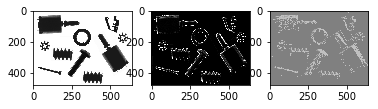

In [7]:
im2sx = cv2.filter2D(im2, -1, sx)
im2sy = cv2.filter2D(im2, -1, sy)

# gradient's magnitude
im2s = np.abs(im2sx) + np.abs(im2sy)

# gradient's direction
im2d = np.arctan2(im2sy, im2sx) # [-pi, pi]
im2d = ((im2d + np.pi)/(2*np.pi)).astype(np.float32) # [0, 1]

plt.figure(2)
plt.subplot(1,3,1), plt.imshow(im2, 'gray')
plt.subplot(1,3,2), plt.imshow(im2s, 'gray')
plt.subplot(1,3,3), plt.imshow(im2d, 'gray', vmin=0, vmax=1)
plt.show()

#### 4. Analize the result of the next code:

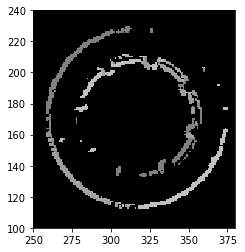

In [8]:
plt.figure(3)
plt.imshow(im2d * (im2s > 55).astype(np.uint8), 'gray', vmax=1)
plt.axis([250, 380, 100, 240])
plt.show()

#### 5. Obtain the binarized grandients of the image `im4` using the Sobel masks and binarization thresholds of 2, 5, 12, 25 and 50.

Use `cv2.threshold(im, th, 255, cv2.THRESH_BINARY)` to binarized an image `im` with a certain threshold `th`. There are more types of thresholding besides of `cv2.THRESH_BINARY` as we will see in the next notebook.

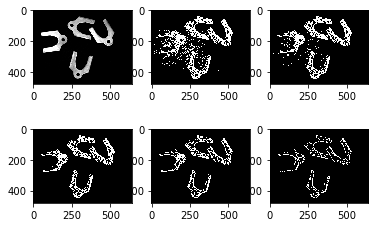

In [9]:
im4sx = cv2.filter2D(im4, -1, sx)
im4sy = cv2.filter2D(im4, -1, sy)
im4s = np.abs(im4sx) + np.abs(im4sy)

plt.figure(4)
plt.subplot(2, 3, 1), plt.imshow(im4, 'gray')
for i, th in enumerate([2, 5, 12, 25, 50]):
    _, im4sb = cv2.threshold(im4s, th, 255, cv2.THRESH_BINARY)
    plt.subplot(2, 3, i+2), plt.imshow(im4sb, 'gray')
plt.show()

#### 6. Apply `cv2,Canny(im, minVal, maxVal)` to the images `im1`, `im2`, `im3` and `im4`. Use `100` as `minVal` and `200` as `maxVal`. Show the results in a single figure.

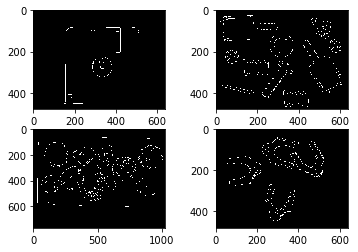

In [10]:
plt.figure(4)
for i, im in enumerate([im1, im2, im3, im4]):
    plt.subplot(2, 2, i+1), plt.imshow(cv2.Canny(im, 100, 200), 'gray')
plt.show()

#### 7. Analize the next code:

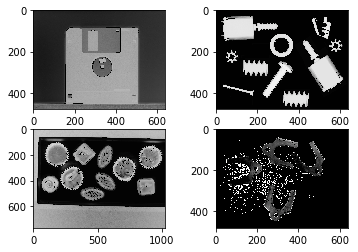

In [11]:
plt.figure(5)
for i, im in enumerate([im1, im2, im3, im4]):
    ime = cv2.Canny(im, 100, 200)/255
    
    imc = np.zeros((*im.shape, 3))
    imc[:, :, 0] = im * (1 - ime)
    imc[:, :, 1] = im * (1 - ime) + 255*ime
    imc[:, :, 2] = im * (1 - ime)
    
    plt.subplot(2, 2, i+1), plt.imshow(imc)

plt.show()

#### 8. Create the kernels for Laplacian-4 and Laplacian-8.

In [12]:
l4 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
l8 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

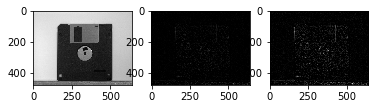

In [13]:
im1l4 = cv2.filter2D(im1, -1, l4)
im1l8 = cv2.filter2D(im1, -1, l8)

plt.figure(6)
plt.subplot(1, 3, 1), plt.imshow(im1, 'gray')
plt.subplot(1, 3, 2), plt.imshow(im1l4, 'gray')
plt.subplot(1, 3, 3), plt.imshow(im1l8, 'gray')
plt.show()